# Hello
***
This project is primarily designed for doctors. With more data, we can develop a comprehensive prediction model. For now, we have created a smaller project using some models and identified the best model with high accurac***y.


we will be importing the libararies as we go move one

In [1]:
import pandas as pd #lets check the data first
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/heart-dataset/heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()  # seems like thier is a float in int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

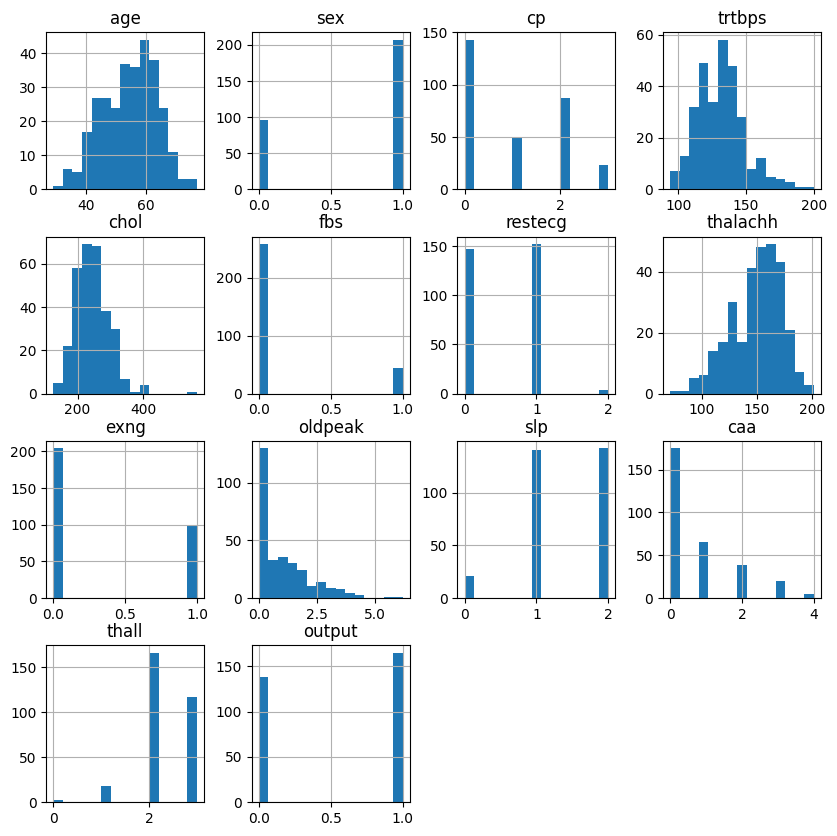

In [7]:
df.hist(bins=15,figsize=(10,10))
plt.show()

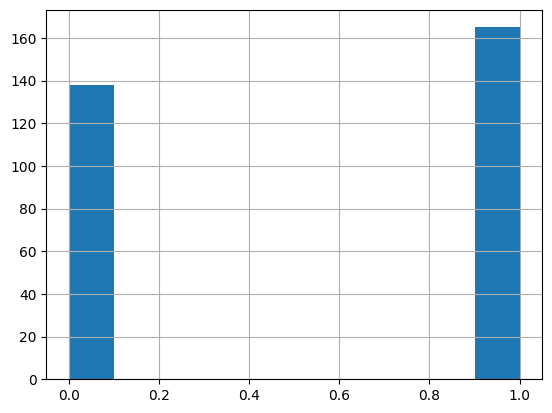

In [8]:
df['output'].hist()
plt.show()

In [9]:
def balance_output(df,target_column="output",risk_value=1,not_risk_value=0):
    risk=len(df[df[target_column]== risk_value]) 
    no_risk=len(df[df[target_column]==not_risk_value])
    total=risk+no_risk
    print(f"percentage not risk :{no_risk/total*100}%") 
    print(f"percentage risk :{risk/total*100}%")

In [10]:
balance_output(df)

percentage not risk :45.54455445544555%
percentage risk :54.45544554455446%


now lets see the balance data for no bias

# Spliting the data 

In [ ]:
from sklearn.model_selection import train_test_split

In [12]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42,stratify=df[["sex"]])

In [13]:
df=train_set.copy()

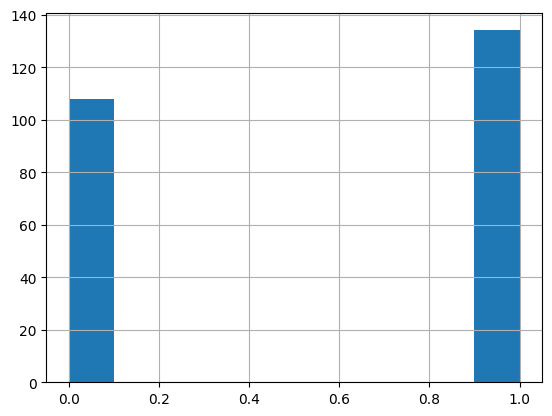

In [14]:
train_set["output"].hist()
plt.show()

In [15]:
balance_output(train_set)

percentage not risk :44.62809917355372%
percentage risk :55.371900826446286%


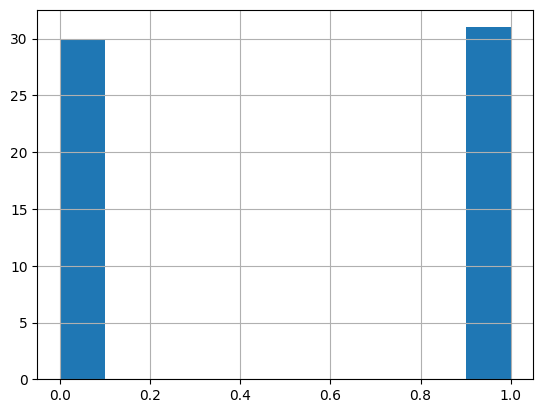

percentage not risk :49.18032786885246%
percentage risk :50.81967213114754%


In [16]:
test_set['output'].hist()
plt.show()
balance_output(test_set)

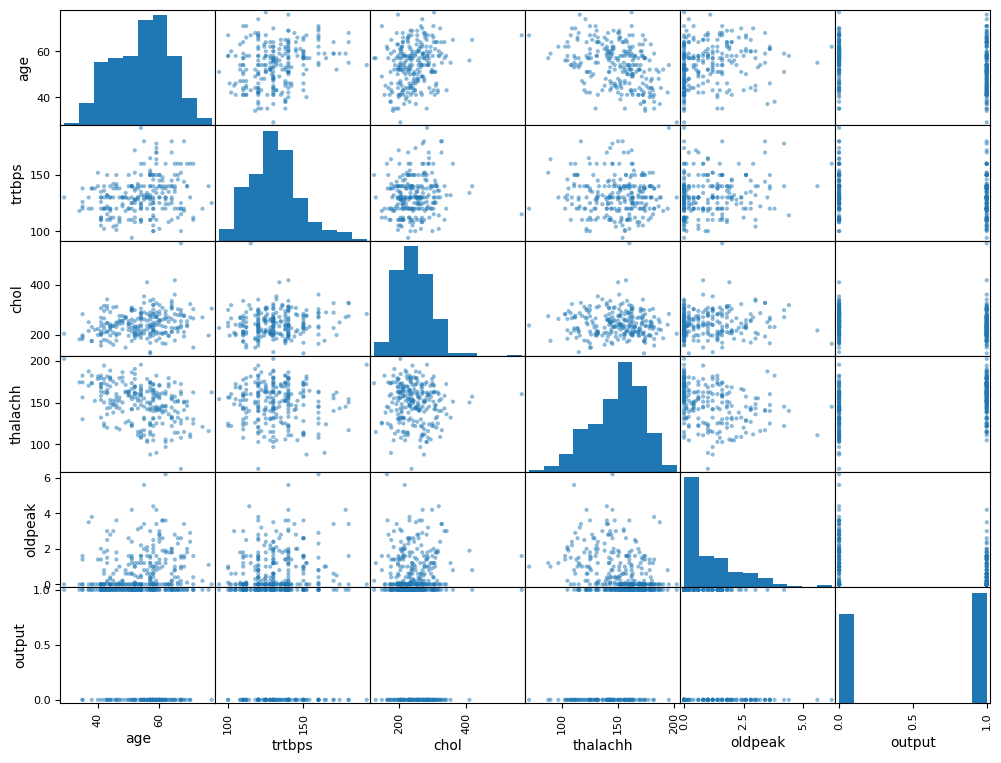

In [17]:
from pandas.plotting import scatter_matrix
att=['age','trtbps','chol','thalachh','oldpeak','output']
scatter_matrix(df[att],figsize=(12,9))
plt.show()

In [18]:
corr=df[att].corr()

<Axes: >

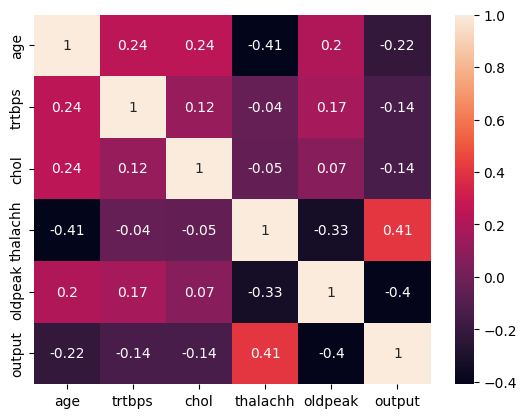

In [19]:
sns.heatmap(round(corr,2),annot=True)

In [20]:
df=train_set.drop("output",axis=1)

In [21]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2


In [22]:
df_labels=train_set['output'].copy()


In [23]:
df_labels

237    0
283    0
142    1
40     1
134    1
      ..
129    1
107    1
47     1
46     1
105    1
Name: output, Length: 242, dtype: int64

In [24]:
df_test=test_set.drop("output",axis=1)


In [25]:
test_label=test_set["output"].copy()

In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.136364,0.681818,0.991736,131.838843,245.338843,0.140496,0.528926,149.404959,0.318182,1.011157,1.409091,0.719008,2.305785
std,9.203215,0.466736,1.046598,17.161512,51.563208,0.348221,0.532346,23.088349,0.466736,1.176252,0.605987,1.020318,0.608965
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000
75%,60.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [27]:
cont=df[["age","trtbps","chol","thalachh","oldpeak"]] # these are the continous data 
cat=df[["sex","cp","fbs","restecg","exng","slp","caa","thall"]] # these are the categorical data 


In [28]:
def drop_col(df,df_labels,col_drop=[]): # instead of droping one by one we will create a drop column funtion
    df_drop=df.drop(col_drop,axis=1)
    df_labels_drop=df_labels.drop(col_drop,axis=1)
    return df_drop,df_labels_drop

In [29]:
heart_red,heart_test_red=drop_col(df,df_test,["oldpeak"])# we removed oldpeak beacuse of low correlation with thalachh

# Pipline

In [30]:
numer_att=list(cont) # we will make a pipeline for smooth process
cat_att=list(cat) #we will fill all the values in a list 


In [31]:
from sklearn.preprocessing import OneHotEncoder# using onehot so we can turn categorical data into numeric 
encoder=OneHotEncoder(handle_unknown="ignore")

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler # using minmaxscaler for machine model 
numeric_pip=Pipeline([
    ("scaler",MinMaxScaler())
])

In [33]:
from sklearn.compose import ColumnTransformer #using column transformer so it wont be mannuly the process
full_pipe=ColumnTransformer([
    ("numeric",numeric_pip,numer_att),
    ("cat",encoder,cat_att)
])

In [34]:
df_pipe=full_pipe.fit_transform(df)
test_pipe=full_pipe.transform(df_test)

In [35]:
df_pipe.shape

(242, 30)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV #using grid search for best parameters


In [37]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2


In [38]:

df







,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2


In [39]:
param_grid=[
    {"C":[0.001,0.01,0.1,1,10,100,1000],
    "penalty":["l1","l2"],
    "solver":['liblinear']}
]

In [40]:
log_reg=LogisticRegression(random_state=42)
grid_search=GridSearchCV(log_reg,param_grid,cv=10,scoring="accuracy",return_train_score=True)

In [41]:
grid_search.fit(df_pipe,df_labels)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             return_train_score=True, scoring='accuracy')

In [42]:
from sklearn.metrics  import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

lets start this one by one 

df_predict=grid_search.predict(test_pipe)

f1_score(df_predict,test_label)

precision_score(df_predict,test_label)

recall_score(df_predict,test_label)

grid_search.best_params_

grid_search.best_score_

confusion_matrix(df_predict, test_label)

to do all these again and again we have to do this manually or we can just make as a function and we can reuse it again and again

In [43]:
def performnace_output(df,df_labels,grid_search,model_name=""):
    df_predict=grid_search.predict(df)
    f1=f1_score(df_predict,df_labels)
    precision=precision_score(df_predict,df_labels)
    recall=recall_score(df_predict,df_labels)
    print(f"{model_name.upper()}\nBest Parameters:{grid_search.best_params_}\n")    
    print(f"Accuracy Score: {grid_search.best_score_}\nPrecision Score: {precision}")
    print(f"Recall Score: {recall}\nF1 Score: {f1}")
    print(f"Confusion Matrix: \n{confusion_matrix(df_predict, df_labels)}")
    


In [44]:
performnace_output(test_pipe,test_label,grid_search,"logistic Regression")


LOGISTIC REGRESSION
Best Parameters:{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy Score: 0.8510000000000002
Precision Score: 0.9032258064516129
Recall Score: 0.8235294117647058
F1 Score: 0.8615384615384616
Confusion Matrix: 
[[24  3]
 [ 6 28]]


# KFold

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
kf=KFold(shuffle=True,n_splits=7)
log_score=cross_val_score(grid_search,df_pipe,df_labels,scoring="accuracy",cv=kf)

In [47]:
log_score.mean()

0.7936374549819928

In [48]:
from sklearn.metrics import classification_report
log_result=grid_search.predict(test_pipe)
print(classification_report(test_label,log_result))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# Radnom Forest


Random Forest is great for heart attack prediction due to its high accuracy from combining multiple decision trees, ability to handle missing data, identification of important features, and robustness against overfitting, ensuring reliable and insightful predictions.

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
param_grid_rf={
    'bootstrap':[True],
    'max_depth': [60,70,80,90],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10],
    'n_estimators':[100,200]
}

In [51]:
rnd_clf=RandomForestClassifier(random_state=42,verbose=0)
grid_search_rf=GridSearchCV(rnd_clf,param_grid_rf,cv=3,n_jobs=-1,verbose=0)

In [52]:
grid_search_rf.fit(df_pipe,df_labels)
performnace_output(test_pipe,test_label,grid_search_rf,"random Forest")

RANDOM FOREST
Best Parameters:{'bootstrap': True, 'max_depth': 60, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

Accuracy Score: 0.8430555555555556
Precision Score: 0.967741935483871
Recall Score: 0.8823529411764706
F1 Score: 0.923076923076923
Confusion Matrix: 
[[26  1]
 [ 4 30]]


In [53]:
rnd_result=grid_search_rf.predict(test_pipe)
print(classification_report(test_label,rnd_result))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.88      0.97      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# SVC



**SVC** is highly accurate, handles high-dimensional data well, adapts to both linear and non-linear classification, and is robust against overfitting. It's a great choice for heart attack prediction due to these strengths.

In [54]:
from sklearn.svm import SVC

In [55]:
svc_clf = SVC(random_state = 42)

param_grid = {
    'C': [0.1, 10, 1000],
    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'gamma': [0.001, 0.01, 0.1, 1],
}

grid_search_svc = GridSearchCV(svc_clf, param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

In [56]:
grid_search_svc.fit(df_pipe,df_labels)
performnace_output(test_pipe,test_label,grid_search_svc,"Random Forest")

RANDOM FOREST
Best Parameters:{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

Accuracy Score: 0.8470679012345679
Precision Score: 0.967741935483871
Recall Score: 0.8571428571428571
F1 Score: 0.909090909090909
Confusion Matrix: 
[[25  1]
 [ 5 30]]


In [57]:
grid_search_svc.best_estimator_

SVC(C=0.1, gamma=0.001, kernel='linear', random_state=42)

In [58]:
svc_result=grid_search_svc.predict(test_pipe)
print(classification_report(test_label,svc_result))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.86      0.97      0.91        31

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



Now we will reduce the dimension curse 

# PCA

In [59]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_pipe)

PCA()

In [65]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)

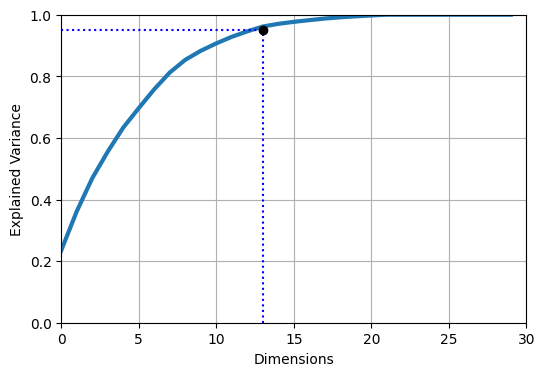

In [66]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "b:")
plt.plot([0, d], [0.95, 0.95], "b:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [69]:
pca=PCA(n_components=0.95)
df_reduced=pca.fit_transform(df_pipe)
print(np.sum(pca.explained_variance_ratio_))

0.9616365473651038


In [71]:
pca = PCA(random_state=42)
svc = SVC(random_state=42)

pipeline = Pipeline([
    ('pca', pca),
    ('svc', svc)
])

param_grid = {
    'pca__n_components': [5, 10, 14, 20, 25, 29],    #reduce to n features
    'pca__svd_solver': ['auto', 'full', "randomized"],  
    'svc__C': [0.1, 10, 1000],
    'svc__kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    
}
grid_search_pca = GridSearchCV(pipeline, param_grid, n_jobs=-1)

In [77]:
grid_search_pca.fit(df_pipe, df_labels)
print(f"Best parameter (CV score={grid_search_pca.best_score_})")
print(grid_search_pca.best_params_)
print("-----")
performnace_output(test_pipe, test_label, grid_search_svc, "SVC ")
print("-----")
performnace_output(test_pipe, test_label, grid_search_pca, "SVC w/ PCA")

Best parameter (CV score=0.8431972789115647)
{'pca__n_components': 10, 'pca__svd_solver': 'auto', 'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
-----
SVC 
Best Parameters:{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

Accuracy Score: 0.8470679012345679
Precision Score: 0.967741935483871
Recall Score: 0.8571428571428571
F1 Score: 0.909090909090909
Confusion Matrix: 
[[25  1]
 [ 5 30]]
-----
SVC W/ PCA
Best Parameters:{'pca__n_components': 10, 'pca__svd_solver': 'auto', 'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}

Accuracy Score: 0.8431972789115647
Precision Score: 0.9354838709677419
Recall Score: 0.8529411764705882
F1 Score: 0.8923076923076922
Confusion Matrix: 
[[25  2]
 [ 5 29]]


In [80]:
print("SVC RESULTS")
print(classification_report(test_label, svc_result))
print("-----------------------------------------------------")

SVC RESULTS
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.86      0.97      0.91        31

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

-----------------------------------------------------


# Final Conclusion

**Final Observations:**
- The top-performing estimator was the `SVC`, achieving an `accuracy` score of `0.90` and a recall of `0.97`.
- While these results are commendable, the application context of the ML pipeline might necessitate prioritizing recall or precision over accuracy.
- If the objective is to equip doctors or patients with a tool to detect heart attack risk in all patients with a true risk value, maximizing recall as close to 100% as possible would be essential.
- Although Artificial Neural Networks (ANNs) could potentially enhance accuracy, they were outside the scope of this project and were not implemented due to time constraints.
- Another improvement avenue could be increasing the sample size. The current dataset comprises only 300 instances, which is relatively small. A larger dataset might enable the ML pipeline to make more accurate predictions.


